<a href="https://colab.research.google.com/github/DS-Jerry-in-Taiwan/project-set/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 你怎麼判斷紅酒的品質，靠味蕾還是機器學習？

- https://reurl.cc/g7y7Ab

In [ ]:
!pip3 install --upgrade yellowbrick

# 載入常用程式庫及定義

In [ ]:
try:
    from google.colab import drive, files
    in_colab = True
except ModuleNotFoundError:
    in_colab = False

if in_colab:
    home_dir = ''
    drive.mount('/content/drive')
    groot_dir = '/content/drive/MyDrive/adventure_time/'
else:
    from pathlib import Path
    home_dir = str(Path.home())
    groot_dir = home_dir + '/Google Drive/adventure_time/'

import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('font', size=14)

from datetime import datetime
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import sklearn
assert sklearn.__version__ >= "0.20"
import seaborn as sns
import pandas as pd
import numpy as np
import math
import os
import sys
import gdown
import requests
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
from pandas.plotting import register_matplotlib_converters

data_dir = groot_dir + 'wine quality/'
figure_dir = groot_dir + 'wine quality/'


gfigure = lambda name: figure_dir + name + '.png'
output_fig = lambda name: plt.savefig( gfigure(name), dpi = 300)

local_time = lambda x, offset: x + relativedelta(hours= offset)
def local_now(hours = 8):
    return datetime.now() + relativedelta(hours = hours if in_colab else 0)

def print_now():
    return print(local_now())

def print_local_now():
    return print('Local Time:', local_now())

def fetch_gdrive_file(fid, local_save):
    remote_url = 'https://drive.google.com/uc?id=' + fid
    gdown.download(remote_url, local_save, quiet = False)

def fetch_file_via_requests(url, save_in_dir):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    output_fpath = save_in_dir + local_filename
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(output_fpath, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
                    # f.flush()
    return output_fpath
        
def acct_string(num):
    s0 = str(num)
    if len(s0) <=3:
        return s0  
    num_section = int(len(s0)/3)
    remaining_start = len(s0) % 3
    s = s0[:remaining_start]
    for i in range(num_section):
        s += ',%s' % s0[remaining_start + i*3 :remaining_start + (i+1)*3]   
    return s

TAIWAN_CSV = '1I5yqulrZSHPSQkxT3oqt_3uVAhPolOEP'
RED_WINE = '1ZDg4EfKkkjsWXfs4L3DkZhnAIfnq98Vk'
TITANIC_TRAIN = '1PrxmUKRQWSlYgtMU13l1E0ob4hVJI20O'
JHU_CSSE = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/'
MNIST_TRAIN = '1E-uJ0zqqAfpsVjoOSzqF5TXhDfPNlkQ5'
MNIST_TRAIN_LABEL = '13clNJ2cd2I90W3DEkDBKjZSDNNEqqx3B'
MNIST_TEST = '1zVpVHJl5YABa3qExt1K-O3WaEHXTJekg'
MNIST_TEST_LABEL = '1qci_-dqubnRN-cdrCsbYaUAxyO7_jH9z'

print('\nThis module is amied to explore wine quality csv...')

print('\nRunning on %s' % sys.platform)
print('Python Version', sys.version)
print('Data storage root points to ==>', groot_dir)
print('Wine Quality data will be stored at ==>', data_dir)
print('\nLibraries and dependenciess imported')
print_local_now()

Mounted at /content/drive

This module is amied to explore wine quality csv...

Running on linux
Python Version 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
Data storage root points to ==> /content/drive/MyDrive/adventure_time/
Wine Quality data will be stored at ==> /content/drive/MyDrive/adventure_time/wine quality/

Libraries and dependenciess imported
Local Time: 2021-04-20 21:06:44.530676


# 熱身：sklearn load_wine

- [sklearn datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)
- [UCI Archive](https://archive.ics.uci.edu/ml/datasets/Wine)

load_xxxx() 傳回的資料是一種叫 bunch 的資料結構，裏面幾個主要欄位的意義是：
- 'features_names': 特徵名，也就是 X 各欄位的名字
- 'target_names': y 的欄位名稱
- ‘data‘： 資料的內容，也就是 X 的所有數值
- ’target‘：標籤，也就是 y 的數值

Fetch_xxxx() 傳回與擷取線上資料集


In [ ]:
from sklearn.datasets import load_wine
wine_data = load_wine() #載入酒類資料

#檢視資料結構與內容



In [ ]:
#檢視資料結構與內容
for key,value in wine_data.items():#sklearn在儲存資料通常都會適用dictionary形式儲存，
                    #所以印出key,value可以檢查其資料的結構

  try:#使用try-except防止意外產生error導致程式崩潰
    print(key,value.shape,type(value))
  except:
    print(key,type(key))#如果欄位本身只是字串，則在打印shape時會出現error,EX:DESCR
print("------------------")
print(wine_data['feature_names'])
print(wine_data['target_names'])#三種答案的多元分類
print(wine_data['DESCR'])

data (178, 13) <class 'numpy.ndarray'>
target (178,) <class 'numpy.ndarray'>
target_names (3,) <class 'numpy.ndarray'>
DESCR <class 'str'>
feature_names <class 'str'>
------------------
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [ ]:
x1,y2=load_wine(return_X_y=True)
x1.shape,wine_data['data'].shape #用此方法載入資料會自動匯入x1,y1中
#x1,y2 會是array格式
#而這樣的方法無法保留相關特徵名稱，故建議使用方法一

((178, 13), (178, 13))

In [ ]:
wdf = pd.DataFrame(data=wine_data['data'],columns=wine_data['feature_names'])#將資料轉成dataframe
wdf['target']=wine_data['target']#新增target欄位
wdf

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### 各欄位的定義

- malic acid 蘋果酸
- ash acid 灰
- alcalinity of ash 灰的鹼性
- magnesium 鎂
- total phenols 總酚
- nonflavanoid_phenols 非類黃酮
- proanthocyanins 原花青素
- color intensity 顏色強度
- hue 色調
- proline 脯氨酸

### 欄位間的關聯

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae56af4450>,
      dtype=object)

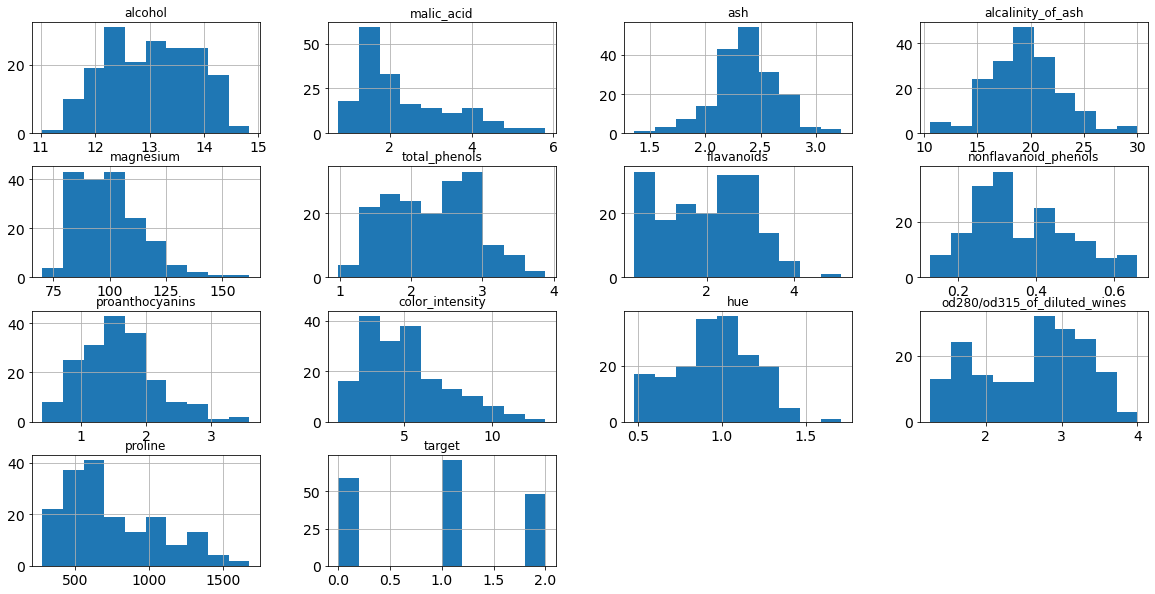

In [ ]:
#檢視欄位的資料分布
fig,ax = plt.subplots(figsize=(20,10))
wdf.hist(ax=ax)

In [ ]:
#用關聯矩陣檢視欄位間的關聯性
corr=wdf.corr()#method是用pearson計算correlation
type(corr)
corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


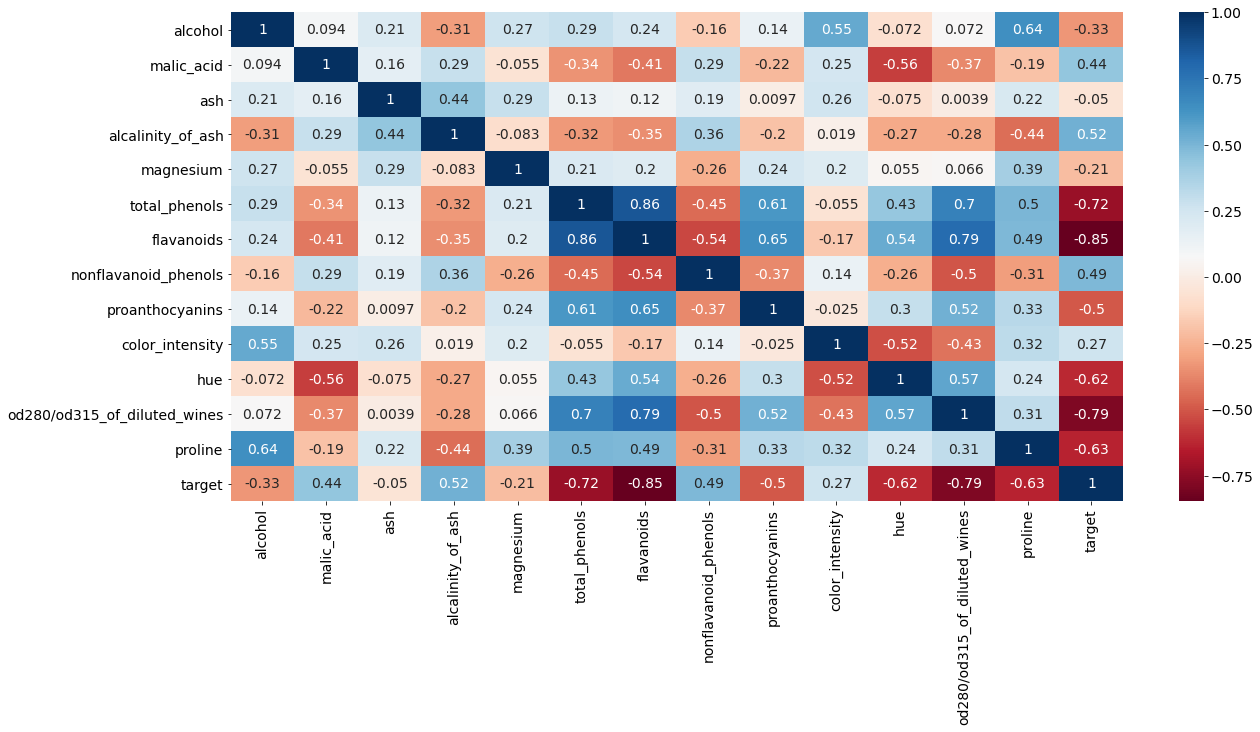

In [ ]:
#將關聯矩陣視覺化以熱圖顯示
fig,ax=plt.subplots(figsize=(20,9))
sns.heatmap(corr,xticklabels=corr.columns,
      yticklabels=corr.columns,annot=True,cmap="RdBu")#用seaborn繪製heatmap

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


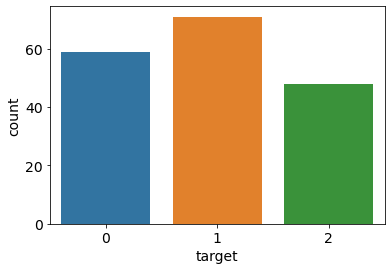

In [ ]:
#用countplot檢視資料分布
sns.countplot(wdf['target'])

In [ ]:
wdf.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

126

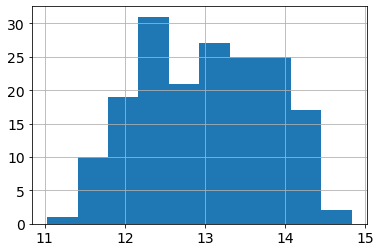

In [ ]:
#計次相關訊息呈現
# unique() --> 不建議使用
wdf['alcohol'].value_counts()#計算欄位數值個數
wdf['alcohol'].hist()
len(wdf['alcohol'].unique())
# wdf['alcohol'].dtype()# 呈現欄位性質

In [ ]:
# fig,ax=plt.subplots(figsize=(20,8))
# wdf["alcohol"].hist(ax=ax,)
#機率分布圖
#kde：是否有繪製圖形的平滑取線
sns.displot(wdf['alcalinity_of_ash'],kde=1,ax=ax)
sns.displot(wdf['alcalinity_of_ash'],kde=0,ax=ax)
sns.displot(wdf['alcalinity_of_ash'],kde=1,ax=ax)


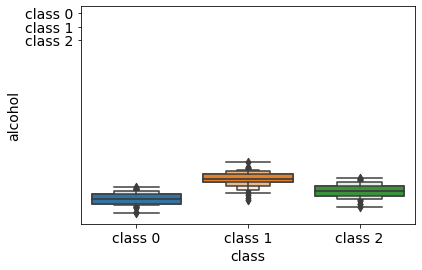

In [ ]:
#箱型圖,y軸必須是離散型變數
sns.boxplot(y='alcohol',x='target',data=wdf)
# 將target轉型成new column{class}
wdf['class']=wdf['target'].map({0:'class 0',1:'class 1',2:'class 2'})
sns.boxplot(x='alcohol',y='class',data=wdf)
#美化版箱型圖
sns.boxenplot(y = 'alcohol',x='class',data=wdf)



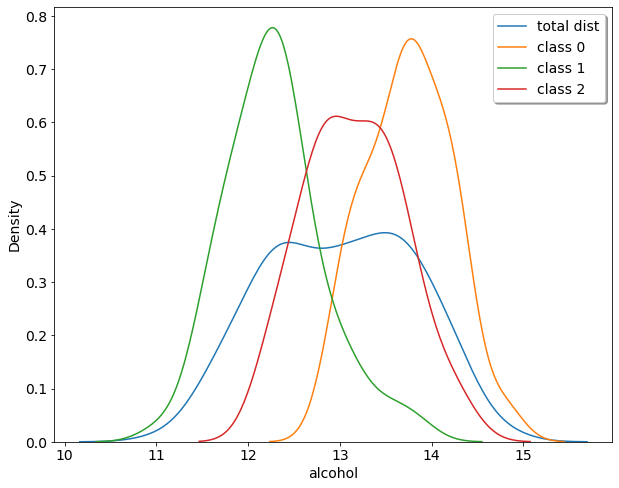

In [ ]:
#純機率分布圖
#seaborn 的特性：可以將複數的圖疊在同一張之上
fig,ax = plt.subplots(figsize=(10,8))
sns.kdeplot(wdf['alcohol'],label='total dist',ax=ax)
sns.kdeplot(wdf['alcohol'][wdf['target']==0],label='class 0',ax=ax)
sns.kdeplot(wdf['alcohol'][wdf['target']==1],label='class 1',ax=ax)
sns.kdeplot(wdf['alcohol'][wdf['target']==2],label='class 2',ax=ax)
ax.legend(loc='best',shadow=True,fontsize=14)

# 第二個資料檔 Wine Quality

- [UCI: Wine Quality](https://archive.ics.uci.edu/ml/datasets/wine+quality)
- [Predicting Wine Quality with Several Classification Techniques](https://towardsdatascience.com/predicting-wine-quality-with-several-classification-techniques-179038ea6434)
- [Wine Quality CSV (kaggle version)](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)
- [Step-by-step guide for predicting Wine Preferences using Scikit-Learn](https://medium.com/analytics-vidhya/step-by-step-guide-for-predicting-wine-quality-using-scikit-learn-de5869f8f91a)

## 下載 wine quality data

### from UCI repository

In [ ]:
wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

#有些時候載下來的資料格式需要用不同的分隔符號
#種類一(;)
fetch_file_via_requests(wine_url,data_dir)#直接將連結中的檔案傳至雲端中


#種類二(,)
wine_dbfile=os.path.join(data_dir,'wine.csv')
fetch_gdrive_file(RED_WINE,wine_dbfile)


Downloading...
From: https://drive.google.com/uc?id=1ZDg4EfKkkjsWXfs4L3DkZhnAIfnq98Vk
To: /content/drive/MyDrive/adventure_time/wine quality/wine.csv
100%|██████████| 101k/101k [00:00<00:00, 14.0MB/s]


In [ ]:
wine_dbfile1=os.path.join(data_dir,'winequality-red.csv')

df1=pd.read_csv(wine_dbfile1,sep=';')#此檔案需要用分(;)分隔
df1

wine_dbfile2=os.path.join(data_dir,'wine.csv')
df2=pd.read_csv(wine_dbfile2)
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### from shared google drive

- [Pandas DataFrame.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [ ]:
wine_dbfile = os.path.join(data_dir, 'winequality-red.csv')
df = pd.read_csv(wine_dbfile, sep=';') #因為csv已經針對分隔做了處理
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


- fixed acidity 固定酸度
- volatile acidity 揮發性酸度
- citric acid 檸檬酸
- residual sugar 殘糖
- chlorides 氯化物
- free sulfur dioxide 游離二氧化硫
- total sulfur dioxide 總二氧化硫
- sulphates 硫酸鹽
- alcohol 酒精
- pH 酸鹼值
- density 密度

## Explore Dataset

In [ ]:
df.columns #檢視欄位名稱
df.isnull().sum() #檢視缺失值

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.info() #欄位資訊
df.describe() #欄位統計特性

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### DataFrame Overview 整體資訊

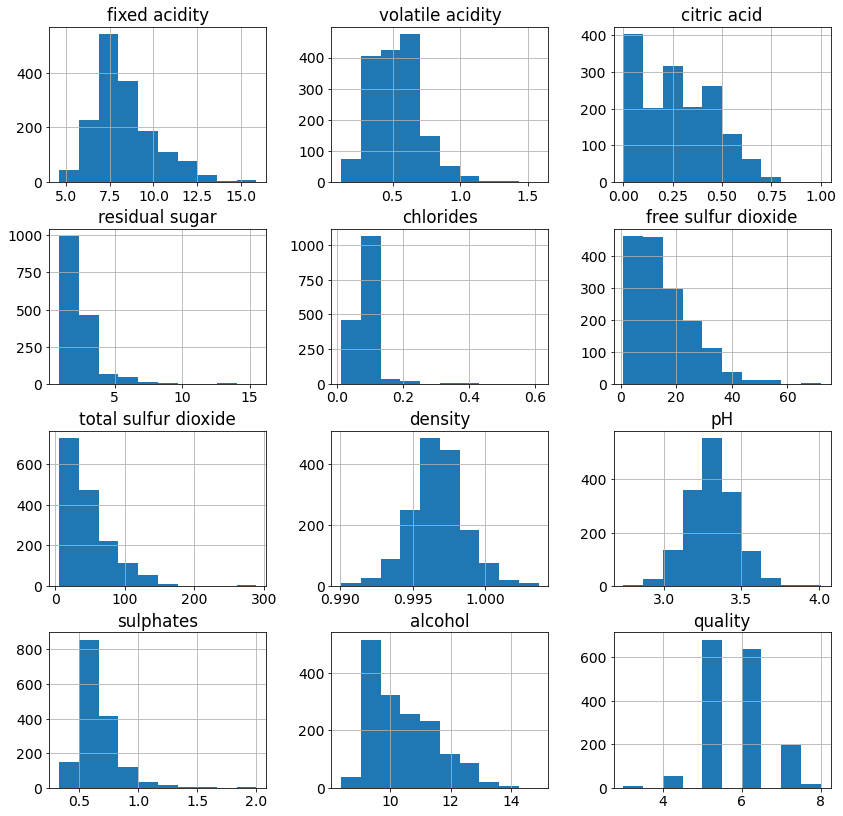

In [ ]:
#直方圖細節的調整
df.hist(bins=10,figsize=(14,14))#檢視變數分佈的直方圖
plt.show()

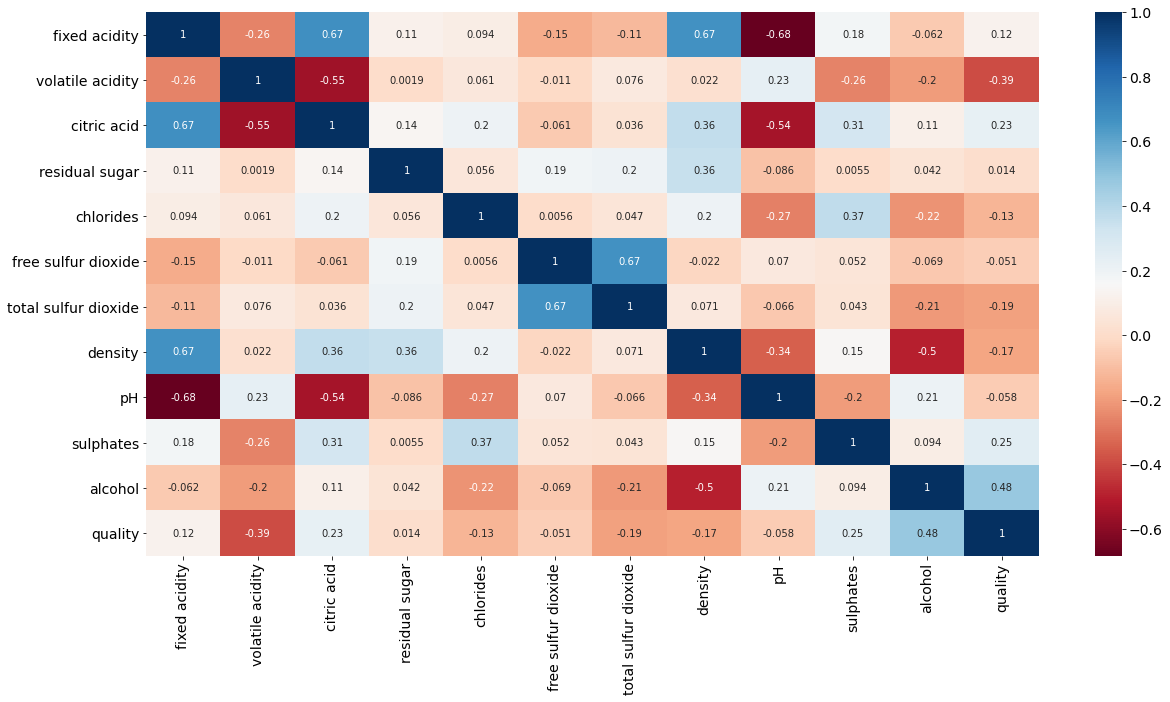

In [ ]:
#關聯矩陣與熱圖
fig,ax = plt.subplots(figsize=(20,10))
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,\
            annot = True, cmap='RdBu',ax=ax)


12
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


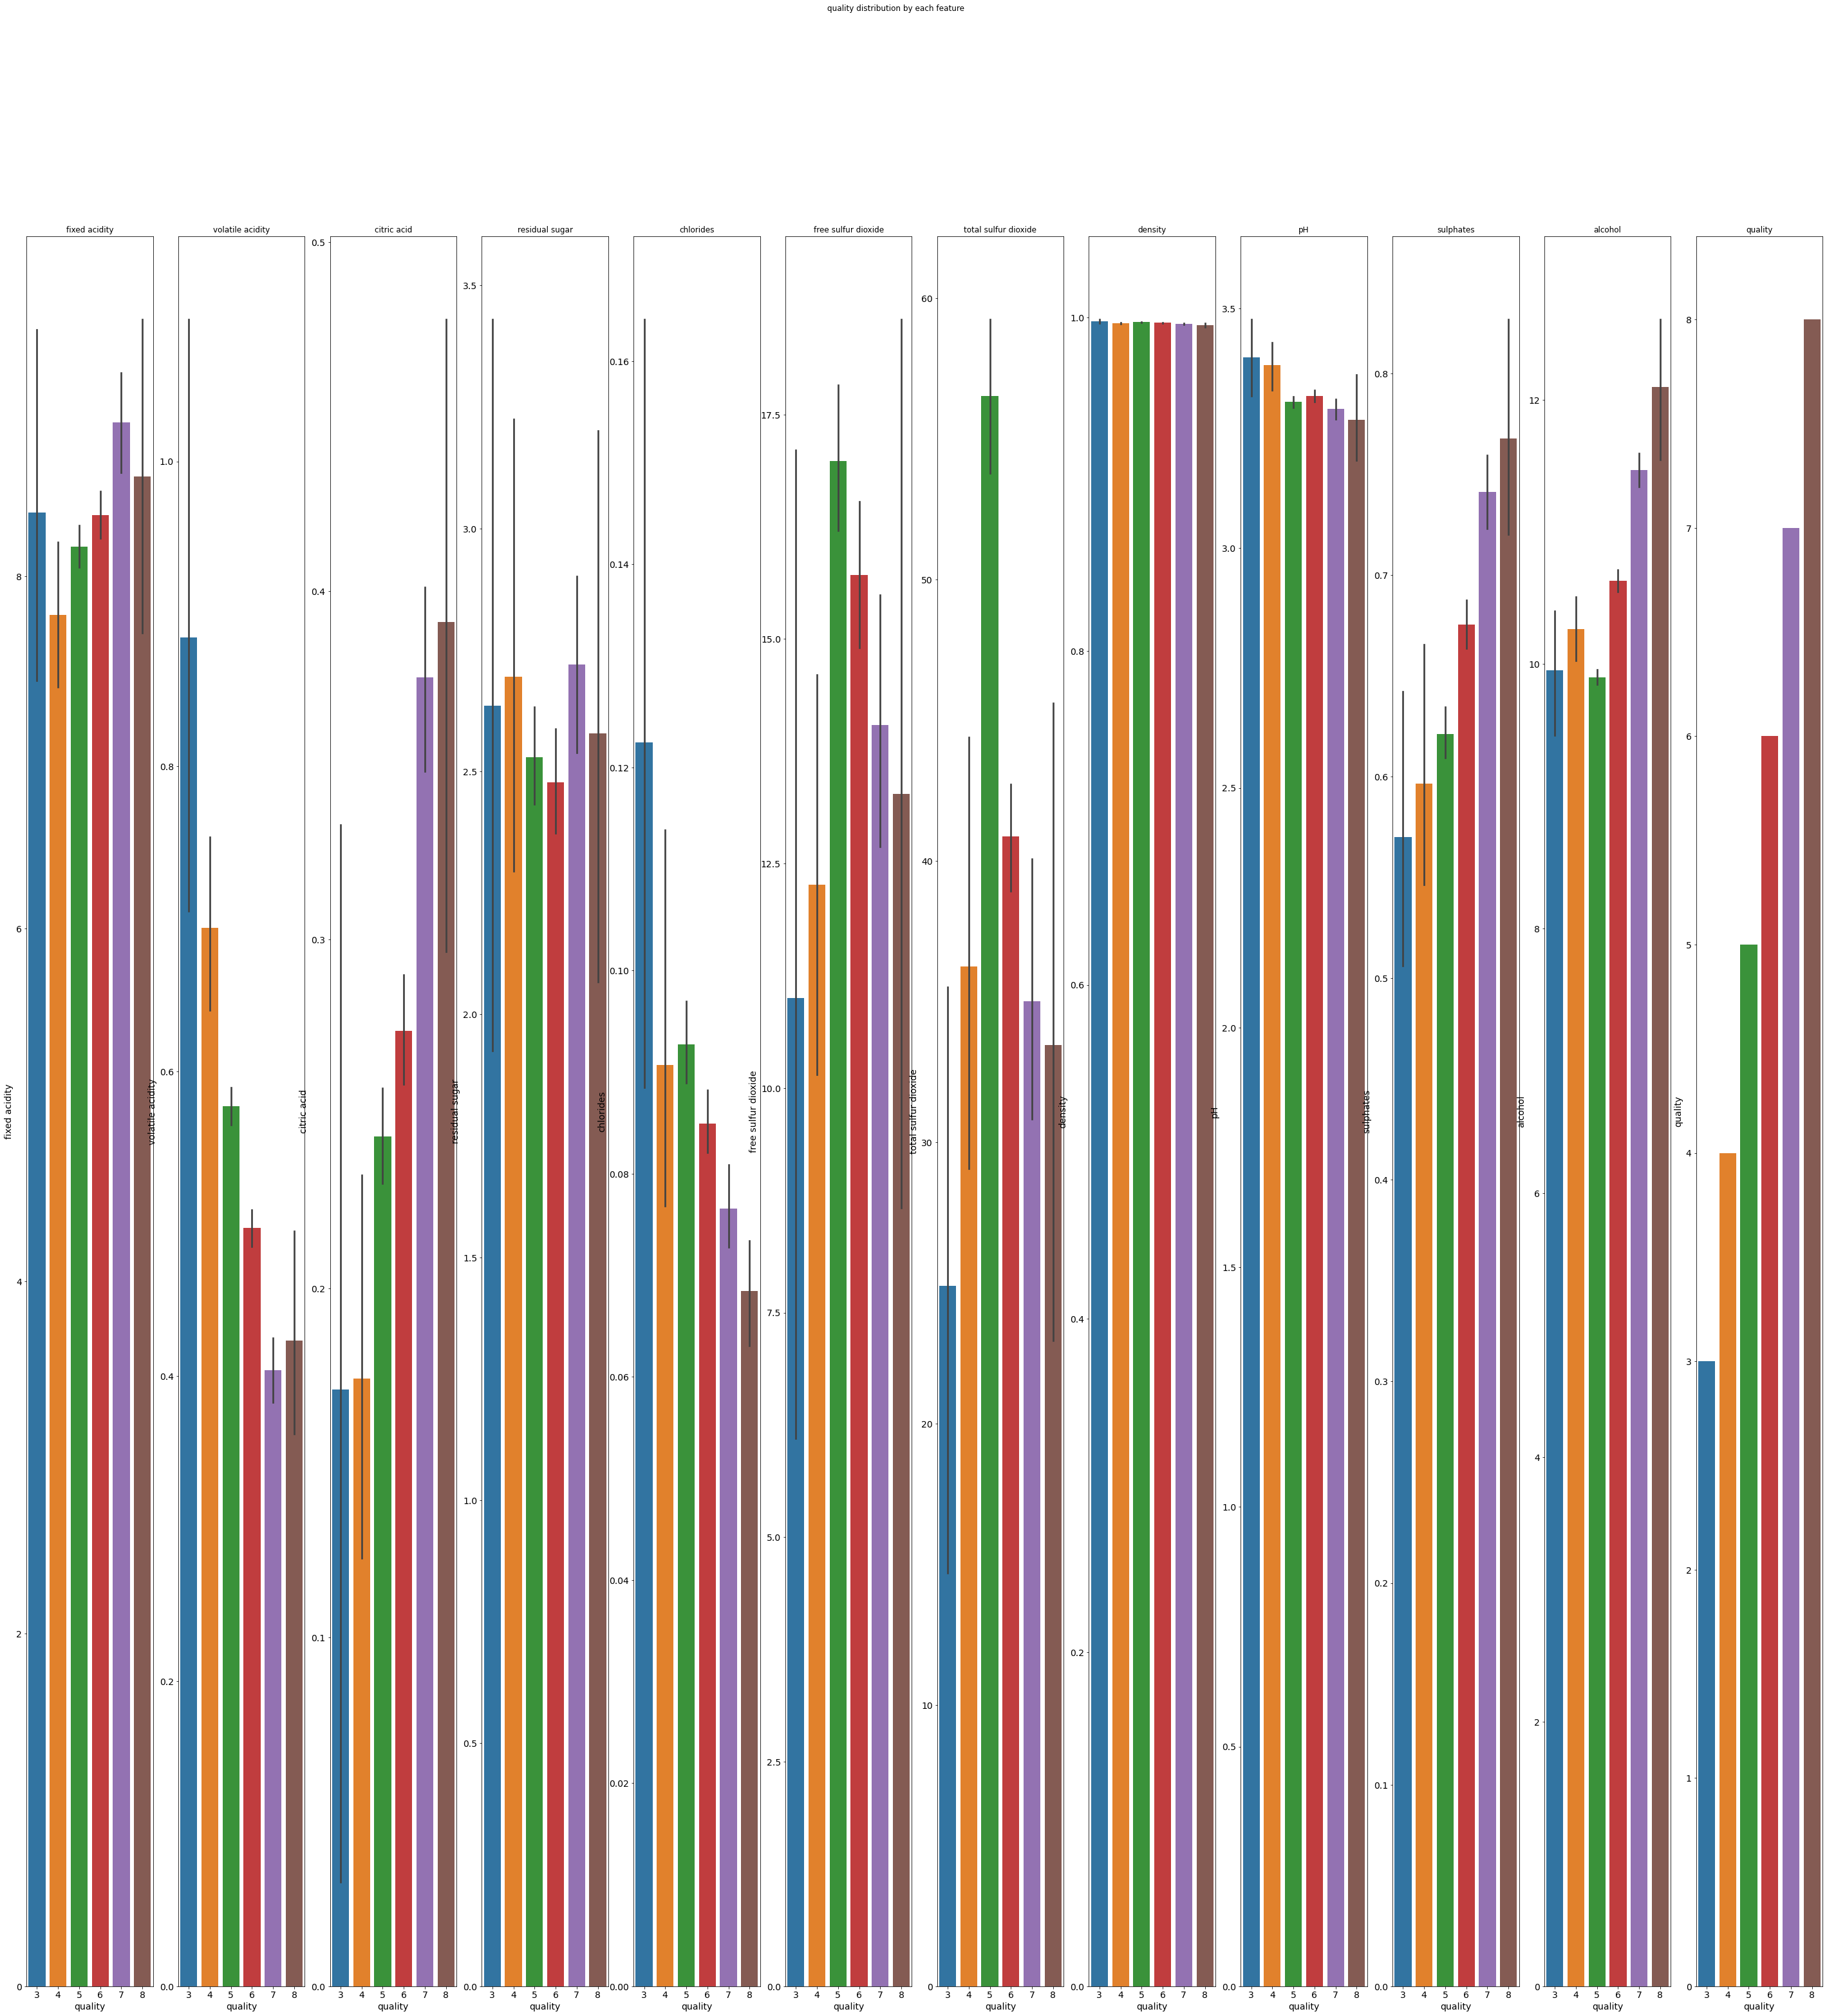

In [ ]:
#嘗試print出欄位與quality 關係
print(len(df.columns))
print(df.columns)
fig,ax=plt.subplots(1,len(df.columns),figsize=(50,50))
fig.suptitle('quality distribution by each feature')
for i in range(len(df.columns)):
  ax[i].set_title(df.columns[i])
  sns.barplot(x='quality',y=df.columns[i],data=df,ax=ax[i])





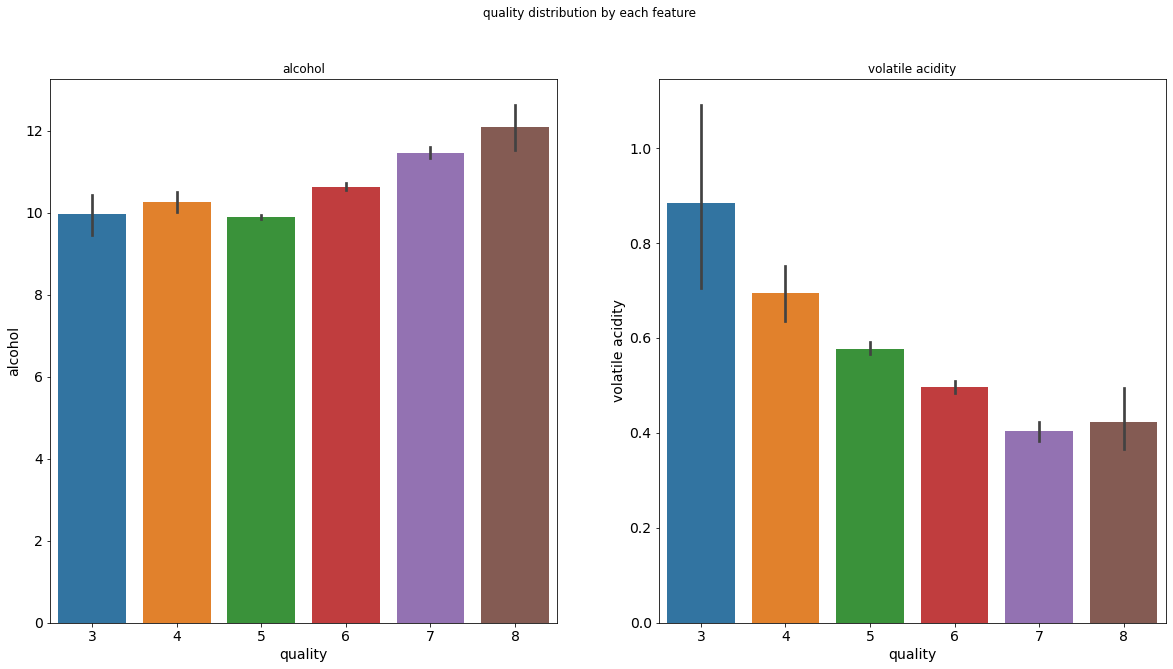

In [ ]:
#corr內的各欄數值
corr["quality"].sort_values(ascending=True)
#若要判斷酒的品質，volatile acidity 與其有較明顯的負相關；alcohol則有較明顯的正相關
fig,ax=plt.subplots(1,2,figsize=(20,10))
fig.suptitle('quality distribution by each feature')
ax[0].set_title('alcohol')
sns.barplot(x='quality',y='alcohol',data=df,ax=ax[0])
ax[1].set_title('volatile acidity')
sns.barplot(x='quality',y='volatile acidity',data=df,ax=ax[1])

### 特定欄位的相關資訊

In [ ]:
#檢視欄位中的相異值各數
df['alcohol'].value_counts
len(df['alcohol'].unique())

65

bad     1382
good     217
Name: quality, dtype: int64

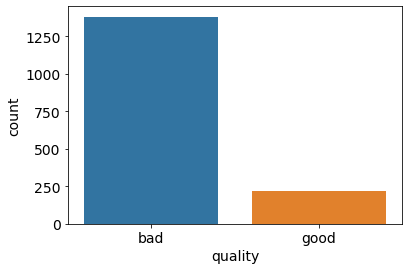

In [ ]:
#檢視quality資料種類，排列方式以資料數多到少排列
df['quality'].unique()
sns.countplot(x='quality',data=df)#視覺化驗證
df['quality'].value_counts()

In [ ]:
#檢視欄位特定值的資訊
df.loc[df['quality']==8] #quality=8的資料
df.loc[df['quality']==8].describe()#檢視欄位統計特性

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 兩個欄位之間的關係

In [ ]:
#抓出特定欄位與其他的關聯性
corr= df.corr()
corr
# corr['quality'].sort_values(ascending=False)[1:]#排除自己對自己的關聯性
#用bar plot檢視欄位的關聯性：+-相關
# fig,ax=plt.subplots(figsize=(20,10))
# sns.barplot(x="quality",y='alcohol',data=df)#正相關
# sns.barplot(x="quality",y='volatile acidity',data=df)#負相關

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


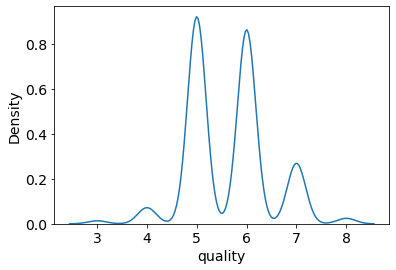

In [ ]:
sns.kdeplot(df['quality'])

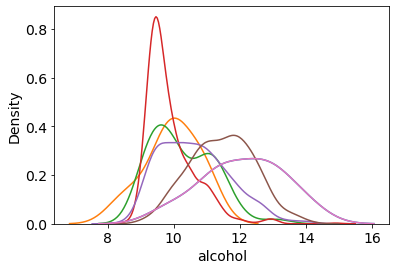

In [ ]:
#繪製quality=8的alcohol資料分布
sns.kdeplot(df['alcohol'][df['quality']==8])
#各quality下的alcohol資料分布
for i in np.sort(df['quality'].unique()):
  sns.kdeplot(df['alcohol'][df['quality']==i],\
  label=f'class={i:d}')#string的格式符號 --> google了解一下



#20210308 紅酒分析7

## Binay Classification

(1599,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


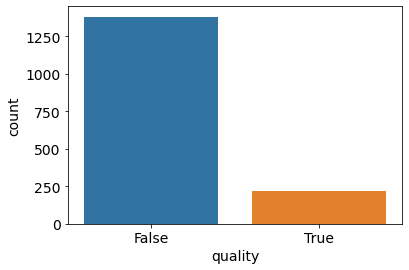

In [ ]:
y6= df['quality'] > 6#將資料切分成兩塊
print(df['quality'].shape)
sns.countplot(y6)#檢視欄位變數個數直方圖,查看資料分布是合理

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<bound method IndexOpsMixin.value_counts of 0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['bad' < 'good']>

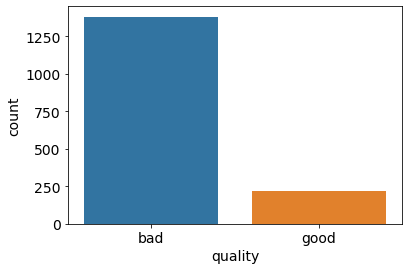

In [ ]:
#第二種方法切割資料：bucketing
#這樣在遇到多元的分割時會比較有效率
bins = (2,6.5,8)#（）：不包含2,8兩個數值

group_name = ['bad','good']
df['quality'] = pd.cut(df['quality'],bins =bins,labels = group_name)
sns.countplot(df['quality'])

df['quality'].value_counts

### Select Classifier

In [ ]:
%time
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#X：除了qaulity之外的欄位; y:y6(binary classification)
x = df.drop(labels='quality',axis=1)
y = y6

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

#用feature scaling standardarization來調整資料點分佈可能造成的偏差
# sc = MinMaxScaler()
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

clf = LinearSVC() #為SVC(knerl = 'linear')-->是SVC的特例
clf.fit(x_train,y_train)
y_hat = clf.predict(x_test)
rep = classification_report(y_test,y_hat)
print(rep)
print_now()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
              precision    recall  f1-score   support

       False       0.90      0.99      0.94       347
        True       0.81      0.25      0.38        53

    accuracy                           0.89       400
   macro avg       0.85      0.62      0.66       400
weighted avg       0.88      0.89      0.87       400

2021-04-20 21:08:01.813372


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


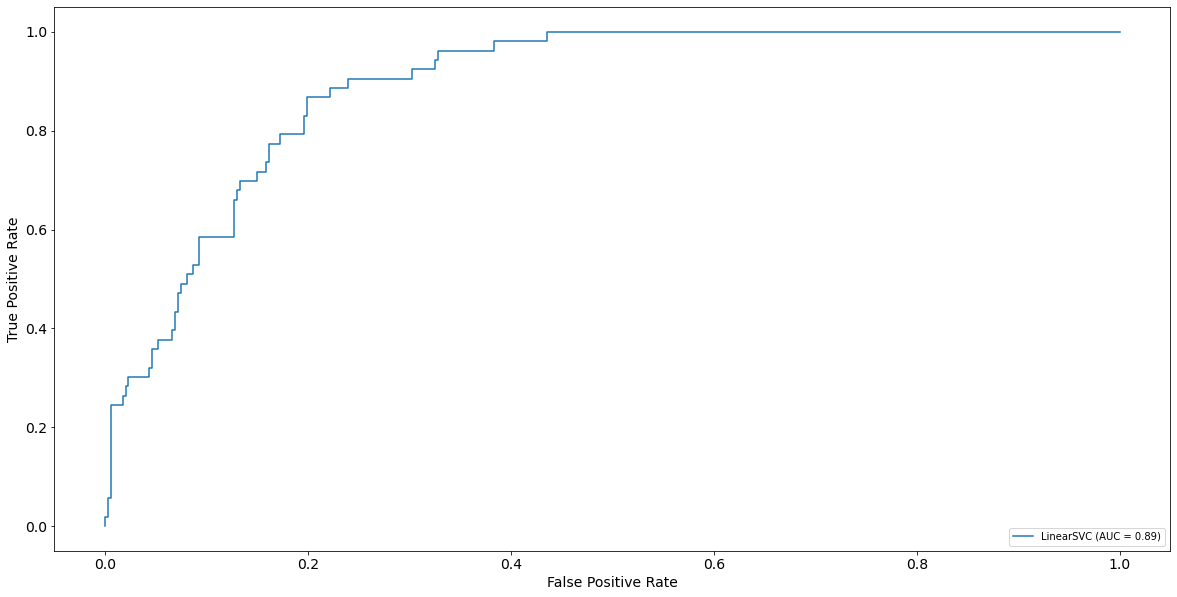

In [ ]:
#繪製ROCcurve
fig,ax = plt.subplots(figsize=(20,10))
plot_roc_curve(clf,x_test,y_test,ax=ax)

## Comparison of Algorithms

- [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
models = []
models.append(('LinearSVC', LinearSVC()))
# models.append(('StochasticGD', SGDClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('KNeighbors', KNeighborsClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('LR Classifier', LogisticRegression()))

In [ ]:
#比較models執行結果，以K-fold cross validation作為比較標準
sc = StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)
results = []
names = []
scores = []
seed = 7
scoring = 'accuracy'

for name,model in models:
  #用KFold function將資料分割成10等分，用以之後的cross validation
  kfold = KFold(n_splits=10,random_state=seed)

  #使用kfold進行cross validation,此處會進行10次cross_validation(kfold=10),
  # 會得到10個score並平均然後做比較
  cv_results = cross_val_score(model,x_train,y_train,
                               cv = kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f'{name:s} done,{cv_results.mean():f}')



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, incr

LinearSVC done,0.859895
RandomForest done,0.902430
DecisionTree done,0.864895
GaussianNB done,0.834888


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNeighbors done,0.859076


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AdaBoost done,0.859055


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR Classifier done,0.873228


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
for i, r in enumerate(results):
  print(models[i][0])
  print('mean = %.4f std = %.4f'%(r.mean(),r.std()))#計算10組cv的accuracy平均與標準差

LinearSVC
mean = 0.8582 std = 0.0307
StochasticGD
mean = 0.7957 std = 0.1548
RandomForest
mean = 0.9083 std = 0.0213
DecisionTree
mean = 0.8741 std = 0.0264
GaussianNB
mean = 0.8357 std = 0.0262
KNeighbors
mean = 0.8633 std = 0.0341
AdaBoost
mean = 0.8682 std = 0.0206
LR Classifier
mean = 0.8741 std = 0.0233


Text(0.5, 1.0, 'Algorithm Comparison')

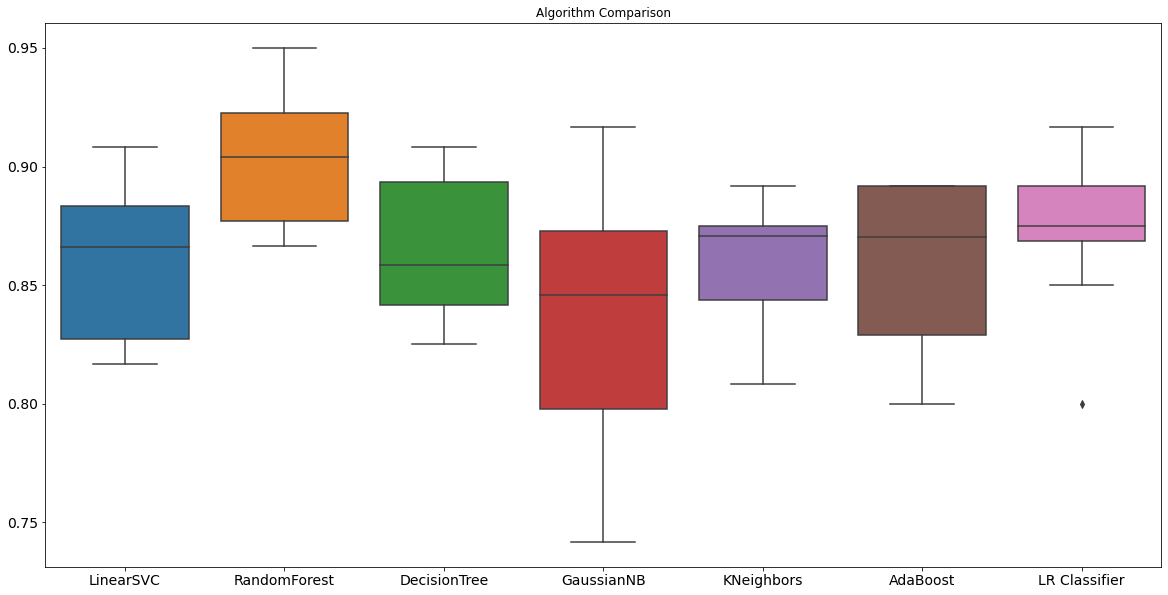

In [ ]:
adf = pd.DataFrame(data=results).transpose()#轉置成以model names 為columns的df
adf.columns = names
fig,ax = plt.subplots(figsize = (20,10))
sns.boxplot(data=adf,ax=ax)
plt.title('Algorithm Comparison')

## Tuning Hyperparameters

> 預先決定就不會改變的參數



- [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV)
- [kNN API](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier)

In [ ]:
#使用gridsearchCV來調整超參數，達到最適效果
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

def knn_param_selection(X,y,nfolds):
  # 創造一個dictionary格式的結構
  param = {
      'n_neighbors':[1,3,5,7,9],
      #distance：依照資料點距離給予權重(越近權重越高);uniform:所有權重都一至
      'weights':['uniform','distance'],
      #計算距離的方法
      'algorithm':['ball_tree','kd_tree','brute']
  }
  grid_search = GridSearchCV(KNeighborsClassifier(),param_grid = param,
                             scoring = 'accuracy',cv=nfolds)
  grid_search.fit(X,y)
  return grid_search.best_params_

print(knn_param_selection(x_train,y_train,5))

{'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'distance'}


- [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC)
- [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=linearsvc#sklearn.svm.LinearSVC)